In [ ]:
#for online notebook
colab.research.google.com

In [1]:
from keras.datasets import imdb

C:\Users\Ayaz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [3]:
len(train_labels)

25000

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
len(decoded_review)

1113

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
print(len(train_data))
print(train_data[1])

25000
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [9]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [10]:
len(x_test)

25000

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model_0=Sequential((Dense(64, activation='relu', input_shape=(10000,)),
                    Dense(1, activation='sigmoid')))

In [14]:
model_1=Sequential((Dense(64, activation='tanh', input_shape=(10000,)),
                 Dense(32, activation='tanh'),
                 Dense(32, activation='tanh'),
                 Dense(16, activation='tanh'),
                 Dense(1, activation='sigmoid')))

In [15]:
model_2=Sequential((Dense(64, activation='relu', input_shape=(10000,)),
                 Dense(32, activation='relu'),
                 Dense(32, activation='relu'),
                 Dense(16, activation='relu'),
                 Dense(16, activation='relu'),
                 Dense(1, activation='sigmoid')))

In [16]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.optimizers import rmsprop 

In [18]:
model_0.compile(rmsprop(lr=.002),loss='binary_crossentropy', metrics=['acc'])
model_1.compile(rmsprop(lr=.002),loss='mse', metrics=['acc'])
model_2.compile(rmsprop(lr=.002),loss='binary_crossentropy', metrics=['acc'])

In [19]:
x_val = x_train[:10000] #for validation spliting from actual data
partial_x_train = x_train[10000:] 
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
import matplotlib.pyplot as plt

### model with 1 hidden layer with 64 nodes

In [21]:
history_0 = model_0.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 16s 1ms/step - loss: 0.4854 - acc: 0.7681 - val_loss: 0.3099 - val_acc: 0.8800
Epoch 2/10
15000/15000 [==============================] - 9s 596us/step - loss: 0.2612 - acc: 0.9008 - val_loss: 0.2859 - val_acc: 0.8863
Epoch 3/10
15000/15000 [==============================] - 10s 699us/step - loss: 0.1843 - acc: 0.9313 - val_loss: 0.4026 - val_acc: 0.8393
Epoch 4/10
15000/15000 [==============================] - 7s 468us/step - loss: 0.1332 - acc: 0.9537 - val_loss: 0.3265 - val_acc: 0.8739
Epoch 5/10
15000/15000 [==============================] - 5s 354us/step - loss: 0.1171 - acc: 0.9575 - val_loss: 0.3200 - val_acc: 0.8776
Epoch 6/10
15000/15000 [==============================] - 4s 271us/step - loss: 0.0757 - acc: 0.9765 - val_loss: 0.3367 - val_acc: 0.8798
Epoch 7/10
15000/15000 [==============================] - 4s 266us/step - loss: 0.0623 - acc: 0.9806 - val_loss: 0.3718 - 

In [57]:
history_dict_0 = history_0.history


NameError: name 'keras' is not defined

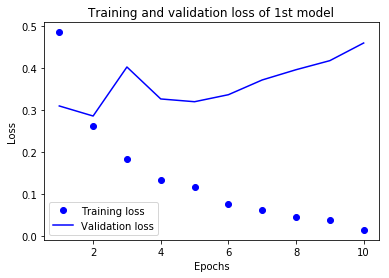

In [37]:
history_dict_0=history_0.history
loss_values=history_dict_0['loss']
val_loss_values=history_dict_0['val_loss']
epochs = range(1, len(history_dict_0['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss of 1st model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

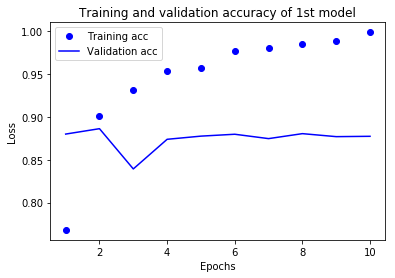

In [38]:
plt.clf()
acc_values = history_dict_0['acc']
val_acc_values = history_dict_0['val_acc']
plt.plot(epochs, history_dict_0['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict_0['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy of 1st model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### model with 3 hidden layers 

In [26]:
history_1 = model_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 13s 866us/step - loss: 0.1719 - acc: 0.7432 - val_loss: 0.0955 - val_acc: 0.8715
Epoch 2/5
15000/15000 [==============================] - 11s 722us/step - loss: 0.0767 - acc: 0.8977 - val_loss: 0.1039 - val_acc: 0.8577
Epoch 3/5
15000/15000 [==============================] - 11s 725us/step - loss: 0.0587 - acc: 0.9235 - val_loss: 0.0854 - val_acc: 0.8820
Epoch 4/5
15000/15000 [==============================] - 8s 517us/step - loss: 0.0437 - acc: 0.9427 - val_loss: 0.1011 - val_acc: 0.8709
Epoch 5/5
15000/15000 [==============================] - 5s 304us/step - loss: 0.0347 - acc: 0.9552 - val_loss: 0.0968 - val_acc: 0.8760


In [30]:
history_dict_1 = history_1.history

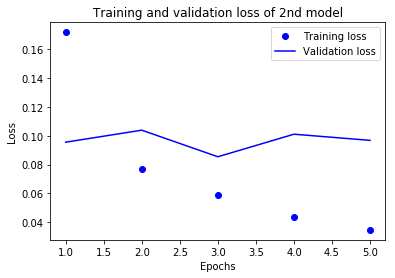

In [31]:
history_dict_1=history_1.history
loss_values=history_dict_1['loss']
val_loss_values=history_dict_1['val_loss']
epochs = range(1, len(history_dict_1['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss of 2nd model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

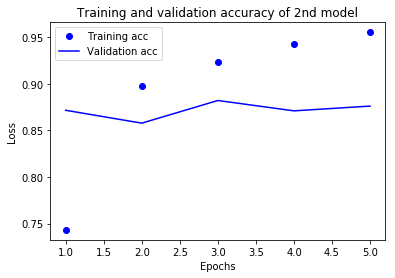

In [32]:
plt.clf()
acc_values = history_dict_1['acc']
val_acc_values = history_dict_1['val_acc']
plt.plot(epochs, history_dict_1['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict_1['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy of 2nd model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### model with 4 hidden layers

In [29]:
history_2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 10s 642us/step - loss: 0.5326 - acc: 0.7334 - val_loss: 0.4762 - val_acc: 0.7807
Epoch 2/3
15000/15000 [==============================] - 9s 628us/step - loss: 0.2821 - acc: 0.8927 - val_loss: 0.2729 - val_acc: 0.8913
Epoch 3/3
15000/15000 [==============================] - 9s 576us/step - loss: 0.1941 - acc: 0.9253 - val_loss: 0.2991 - val_acc: 0.8823


In [33]:
history_dict_2 = history_2.history

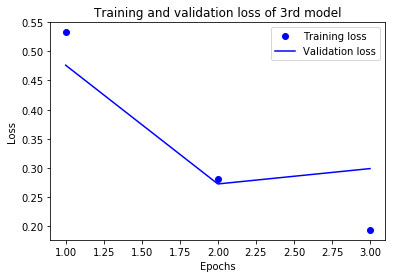

In [34]:
history_dict_2=history_2.history
loss_values=history_dict_2['loss']
val_loss_values=history_dict_2['val_loss']
epochs = range(1, len(history_dict_2['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss of 3rd model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

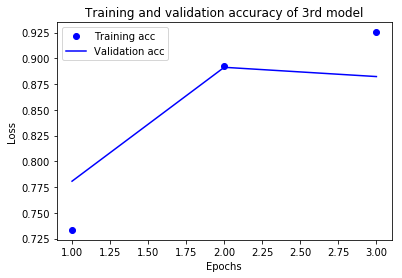

In [35]:
plt.clf()
acc_values = history_dict_2['acc']
val_acc_values = history_dict_2['val_acc']
plt.plot(epochs, history_dict_2['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict_2['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy of 3rd model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
acc_values

[0.7333999998728434, 0.892733333269755, 0.9253333331108093]

In [39]:
import csv


In [40]:
import pandas as pd 

In [42]:
data=pd.read_csv("winequality-white.csv")

In [45]:
df=pd.DataFrame(data)

In [54]:
df.columns[0]

'fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'

In [55]:
data.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    4898 non-null object
dtypes: object(1)
memory usage: 38.3+ KB
